In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets  # interactive display

In [3]:
def create_basic_textures(tex_size, amplitude_exponent, n_textures):
    
    # half of texture
    t2 = int(tex_size/2)
    
    # making the grid from negative t2 through 0 to postitive t2
    X,Y = np.meshgrid(np.linspace(-t2,t2,tex_size,endpoint=True),
                    np.linspace(-t2,t2,tex_size,endpoint=True))
    
    # making an eccentricity with lower values towards the middle
    ecc = np.sqrt(X**2 + Y**2)
    
    # ecc**-amplitude_exponent accentuates eccentricity and inverts values, now a peak in the middle of spectrum
    # fftshift shifts the zero-frequency component to the center of the sprectrum, the middle "to the corners"
    ampl_spectrum = np.fft.fftshift(ecc**-amplitude_exponent, (0,1))
    
    # bunch of random phases in tex_size
    phases = np.random.randn(n_textures, tex_size, tex_size) * 2 * np.pi
    
    # placeholder for result
    textures = np.zeros((n_textures, tex_size, tex_size))
    
    # loop over different textures
    for nt in range(n_textures):
        # merging amplitudes and phases into a complex number
        compl_f = ampl_spectrum * np.sin(phases[nt]) + 1j * ampl_spectrum * np.cos(phases[nt])
        # inverse fft, then taking real part
        textures[nt] = np.fft.ifft2(compl_f).real
        # center at zero
        textures[nt] -= textures[nt].mean()
        # scale and clip to be within [-1,1] -- all kosher? seems like actually is scaled between 0 and 1
        textures[nt] /= textures[nt].std()*6.666
        textures[nt] += 0.5
        textures[nt][textures[nt]<0] = 0
        textures[nt][textures[nt]>1] = 1

    return textures


### Producing stimuli

- max contrast
- generate at 1024 x 1024, show at 920 x 920
- according to [Isherwood2017](https://www.sciencedirect.com/science/article/pii/S1053811916305602#s0085)
    - $\alpha$ between .75 and 1.25

In [11]:
# create
n_textures=10
tex_size = 1024
amplitude_exponent = 1

texture = create_basic_textures(tex_size = tex_size, amplitude_exponent=amplitude_exponent, n_textures= n_textures)

In [9]:
np.min(texture[1])

0.0

In [5]:
# inspect
@widgets.interact(i = widgets.IntSlider(value=0, min=0, max=n_textures, step=1))

def plot_ims(i):
    plt.imshow(texture[i])

interactive(children=(IntSlider(value=0, description='i', max=10), Output()), _dom_classes=('widget-interact',…

In [21]:
# save
from PIL import Image

for i in range(n_textures):
    im = Image.fromarray(texture[i], mode = 'P')
    im.save(f"oneOverF_texture_{amplitude_exponent}_{tex_size}_{i}.bmp")


In [32]:
import imageio

for i in range(n_textures):
    out_path = f"textures/oneOverF_texture_{amplitude_exponent}_{tex_size}_{i}.bmp"
    imageio.imwrite(out_path, (texture[i]*255).astype(np.uint8))


In [30]:
(texture[i]*256).astype(np.uint8)

array([[179, 171, 168, ..., 163, 177, 153],
       [190, 153, 163, ..., 188, 188, 189],
       [222, 179, 184, ..., 194, 189, 207],
       ...,
       [151, 149, 136, ..., 161, 189, 203],
       [125, 143, 147, ..., 151, 182, 165],
       [160, 166, 153, ..., 190, 173, 162]], dtype=uint8)

### Messing with the function

In [46]:
tex_size = 50
t2 = tex_size/2
X,Y = np.meshgrid(np.linspace(-t2,t2,tex_size,endpoint=True),
                    np.linspace(-t2,t2,tex_size,endpoint=True))
ecc = np.sqrt(X**2 + Y**2)


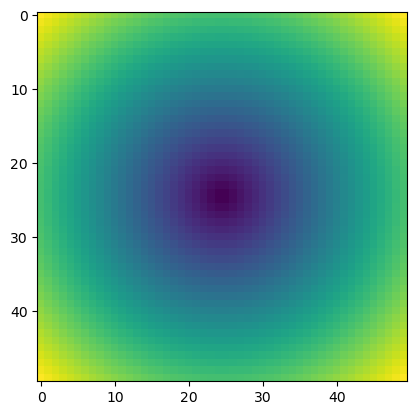

In [47]:
plt.imshow(ecc)

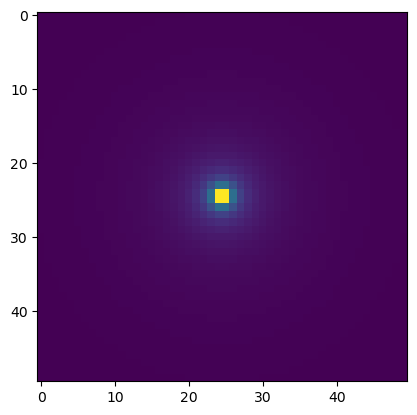

In [56]:
plt.imshow(ecc**-amplitude_exponent)

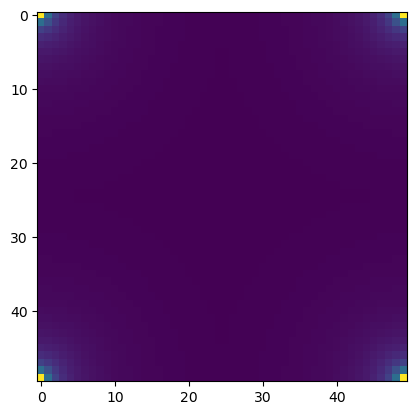

In [55]:
amplitude_exponent=1.25
ampl_spectrum = np.fft.fftshift(ecc**-amplitude_exponent, (0,1))
plt.imshow(ampl_spectrum)

In [59]:
phases = np.random.randn(n_textures, tex_size, tex_size) * 2 * np.pi
phases.shape



(100, 50, 50)

In [60]:
@widgets.interact(i = widgets.IntSlider(value=0, min=0, max=n_textures, step=1))

def plot_ims(i):
    plt.imshow(phases[i])

interactive(children=(IntSlider(value=0, description='i'), Output()), _dom_classes=('widget-interact',))

In [63]:
nt = 1
compl_f = ampl_spectrum * np.sin(phases[nt]) + 1j * ampl_spectrum * np.cos(phases[nt])
compl_f.shape

(50, 50)

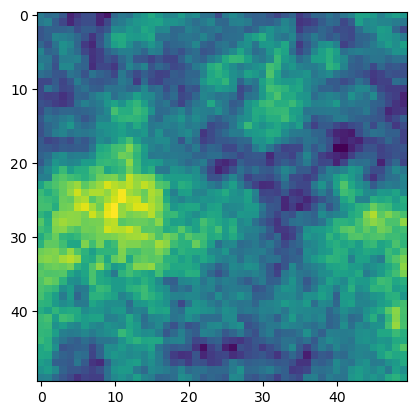

In [68]:
texture_ = np.fft.ifft2(compl_f).real
texture_.shape
plt.imshow(texture_)

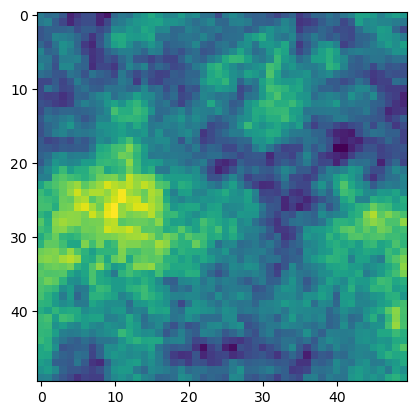

In [70]:
# scale and clip
texture_ /= texture_.std()*6.666
texture_ += 0.5
texture_[texture_<0] = 0
texture_[texture_>1] = 1

plt.imshow(texture_)